In [90]:
import pandas as pd
import numpy as np

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1


In [78]:
!wget -O Fake_True.csv https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo&st=cna8ywzy&dl=0

--2024-08-24 10:04:14--  https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd27c1cb73e18f586576a33d85b.dl.dropboxusercontent.com/cd/0/inline/CZODzAYezlk_wAKI4ZU9O2PSF96AV5LVvTppmovZLw8RrUUjqBVUCUDisBEaY1ldJNLMedLS3YWOx5Ecb5ojYG0QS_ASTKD8-fPOR-pH4h7GQdtT4D_mfrN_q5U-yqIDO42n7I5MMy7RFbAkEU_-E9y_/file# [following]
--2024-08-24 10:04:15--  https://ucd27c1cb73e18f586576a33d85b.dl.dropboxusercontent.com/cd/0/inline/CZODzAYezlk_wAKI4ZU9O2PSF96AV5LVvTppmovZLw8RrUUjqBVUCUDisBEaY1ldJNLMedLS3YWOx5Ecb5ojYG0QS_ASTKD8-fPOR-pH4h7GQdtT4D_mfrN_q5U-yqIDO42n7I5MMy7RFbAkEU_-E9y_/file
Resolving ucd27c1cb73e18f586576a33d85b.dl.dropboxusercontent.com (ucd27c1cb73e18f586576a33d85b.dl.dropboxusercontent.com)... 162.125.5.15, 2

In [79]:
df = pd.read_csv("Fake_True.csv")

Построем модель, используя TfidfVectorizer.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['reliability'],
                                                    test_size=0.25)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Построим consufion matrix

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5701
           1       0.99      0.99      0.99      5366

    accuracy                           0.99     11067
   macro avg       0.99      0.99      0.99     11067
weighted avg       0.99      0.99      0.99     11067



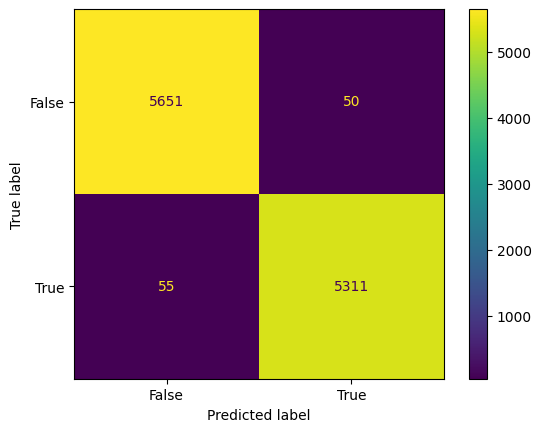

Accuracy Score of SVC: 99.05123339658444 %


In [83]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
print(report)
cm_display.plot()
plt.show()
print("Accuracy Score of SVC:", acc*100,"%")

In [84]:
import pickle
filename = 'linear_model.bin'
pickle.dump(model, open(filename, 'wb'))
filename = 'vectorization.bin'
pickle.dump(vectorization, open(filename, 'wb'))

In [85]:
print(sklearn.__version__)

1.3.2
